In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting the current working directory
import os; os.chdir('drive/My Drive/project_NN')

In [3]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, h5py
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers



In [5]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers

In [6]:
!ls '/content/drive/My Drive/project_NN'

Autonomous_Vehicles_SVHN_single_grey1.h5


In [8]:
# Read the h5 file
h5_SVH = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')
h5_SVH.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [9]:
# Load the training, validation and test sets
X_train = h5_SVH['X_train']
X_test = h5_SVH['X_test']
X_val = h5_SVH['X_val']
y_train = h5_SVH['y_train']
y_test = h5_SVH['y_test']
y_val = h5_SVH['y_val']

# Close this file

#h5_SVH.close()

print('The shape of the training dataset:', X_train.shape)
print('The shape of the training (y) dataset:', y_train.shape)
print('The shape of the validation dataset:', X_val.shape)
print('The shape of the validation (y) dataset:', y_val.shape)
print('The shape of the test dataset:', X_test.shape)
print('The shape of the test (y) dataset:', y_test.shape)

The shape of the training dataset: (42000, 32, 32)
The shape of the training (y) dataset: (42000,)
The shape of the validation dataset: (60000, 32, 32)
The shape of the validation (y) dataset: (60000,)
The shape of the test dataset: (18000, 32, 32)
The shape of the test (y) dataset: (18000,)


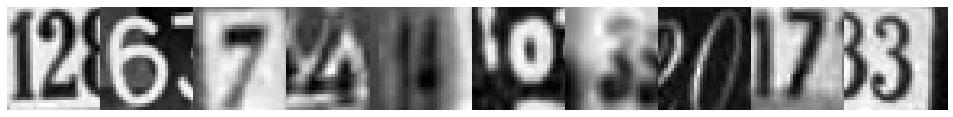

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [11]:
# Visualizing first 10 images in the dataset and their labels
plt.figure(figsize = (15, 4.5))
for i in range(10):  
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape((32, 32)),cmap = plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace = -0.1, hspace = -0.1)
plt.show()

print('Label for each of the above image: %s' % (y_train[0 : 10]))

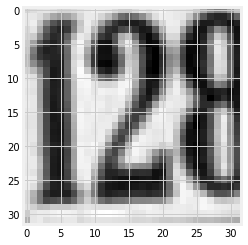

Label: 2


In [12]:
plt.imshow(X_train[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_train[0])

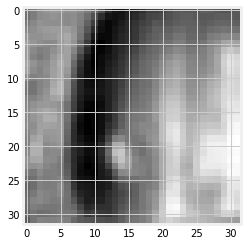

Label: 1


In [13]:
plt.imshow(X_train[10], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_train[10])

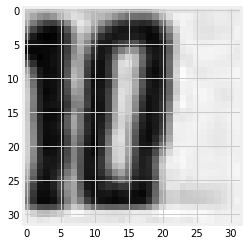

Label: 0


In [14]:
plt.imshow(X_val[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_val[0])

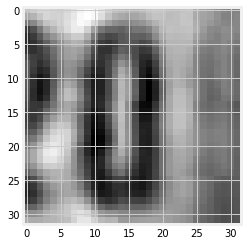

Label: 0


In [15]:
plt.imshow(X_val[20], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_val[20])

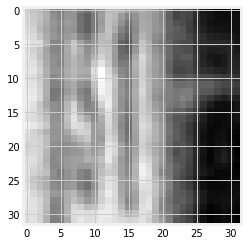

Label: 1


In [16]:
plt.imshow(X_test[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_test[0])


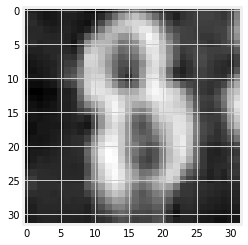

Label: 8


In [17]:
plt.imshow(X_test[10], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_test[10])


## **Implementing an optimal K-Nearest Neighbour Classifier**

In [18]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000, 1024)
X_test = np.asarray(X_test).reshape(18000, 1024)
X_val = np.asarray(X_val).reshape(60000, 1024)

Normalizing the Train, Test and Validation image data from 0 - 255 to 0 - 1 to ensure that our models converge faster.

In [19]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

In [20]:
# creating odd list of K for KNN
neighbors = list(range(1, 30, 2))

In [23]:
# empty list that will hold accuracy scores
accuracy_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(X_train, y_train)
    # predict the response
    y_predictKNN = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predictKNN)
    accuracy_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in accuracy_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is: ', optimal_k)

The optimal number of neighbors is:  27


In [24]:
# Retraining the model using the optimal k-value found above and predicting the labels on the test data
knn = KNeighborsClassifier(n_neighbors = optimal_k, n_jobs = -1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [25]:
# Classification Metric Report

print('Classification Metric Report:\n', classification_report(y_test, predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))
print('\nAccuracy Score:', accuracy_score(y_test, predictions))

Classification Metric Report:
               precision    recall  f1-score   support

           0       0.46      0.71      0.56      1814
           1       0.46      0.73      0.56      1828
           2       0.64      0.54      0.58      1803
           3       0.47      0.43      0.45      1719
           4       0.64      0.65      0.65      1812
           5       0.53      0.40      0.45      1768
           6       0.51      0.41      0.46      1832
           7       0.71      0.62      0.66      1808
           8       0.47      0.37      0.41      1812
           9       0.55      0.44      0.49      1804

    accuracy                           0.53     18000
   macro avg       0.54      0.53      0.53     18000
weighted avg       0.54      0.53      0.53     18000

Confusion Matrix:
 [[1289   60   31   44   51   29   94   39   70  107]
 [  96 1337   54   82   80   34   33   51   32   29]
 [  90  249  971   92   48   45   30  146   45   87]
 [ 121  267  118  742   57  165 

```Accuracy Score```: 0.53.227

The accuracy of the model is 53.22% which seems to be on the lower side.

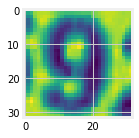

Label:  [9]


In [26]:
# Predicting the digits using KNN Classifier

plt.figure(figsize = (2,2))
plt.imshow(X_test[70].reshape(32, 32))
plt.show()
image = X_test[70]
print('Label: ', knn.predict(image.reshape(1, -1)))

#### The KNN Classifier predicted the digit correctly.

# **Implementing Deep Neural Network**

In [27]:
#Reshaping the data from 2D to 1D i.e., 32 X 32 = 1024
X_train = np.asarray(X_train).reshape(42000, 1024)
X_test = np.asarray(X_test).reshape(18000, 1024)
X_val = np.asarray(X_val).reshape(60000, 1024)

In [28]:
#Converting output labels to binary class matrices (one-hot encoding)

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes = 10)

print('First 5 examples in training dataset now are: \n', y_train[0:5])
print('\nFirst 5 examples in validation dataset now are: \n', y_val[0:5])
print('\nFirst 5 examples in test dataset now are: \n', y_test[0:5])

First 5 examples in training dataset now are: 
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

First 5 examples in validation dataset now are: 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

First 5 examples in test dataset now are: 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [29]:
print('The shape of the training dataset:', X_train.shape)
print('The shape of the training (y) dataset:', y_train.shape)
print('The shape of the validation dataset:', X_val.shape)
print('The shape of the validation (y) dataset:', y_val.shape)
print('The shape of the test dataset:', X_test.shape)
print('The shape of the test (y) dataset:', y_test.shape)

The shape of the training dataset: (42000, 1024)
The shape of the training (y) dataset: (42000, 10)
The shape of the validation dataset: (60000, 1024)
The shape of the validation (y) dataset: (60000, 10)
The shape of the test dataset: (18000, 1024)
The shape of the test (y) dataset: (18000, 10)


# **Implementing Neural Network**


In [30]:
#Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

In [31]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer = 'he_normal', input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer of 256 nodes
keras_model.add(Dense(256, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer of 128 nodes
keras_model.add(Dense(128, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer of 64 nodes
keras_model.add(Dense(64, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer of 32 nodes
keras_model.add(Dense(32, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [32]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [33]:
## Using SGD as optimizer and Categorical Crossentropy as loss function and accuracy as the metric to monitor the accuracy of the model
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 20, verbose = 1)

Epoch 1/20
210/210 [==============================] - 6s 24ms/step - loss: 2.2824 - accuracy: 0.1452 - val_loss: 2.2527 - val_accuracy: 0.1575
Epoch 2/20
210/210 [==============================] - 5s 23ms/step - loss: 2.2189 - accuracy: 0.2174 - val_loss: 2.1885 - val_accuracy: 0.2100
Epoch 3/20
210/210 [==============================] - 5s 25ms/step - loss: 2.1371 - accuracy: 0.2713 - val_loss: 2.0726 - val_accuracy: 0.2844
Epoch 4/20
210/210 [==============================] - 7s 31ms/step - loss: 2.0000 - accuracy: 0.3317 - val_loss: 1.8856 - val_accuracy: 0.3907
Epoch 5/20
210/210 [==============================] - 6s 27ms/step - loss: 1.8464 - accuracy: 0.3841 - val_loss: 1.7660 - val_accuracy: 0.4152
Epoch 6/20
210/210 [==============================] - 6s 28ms/step - loss: 1.7124 - accuracy: 0.4320 - val_loss: 1.6259 - val_accuracy: 0.4720
Epoch 7/20
210/210 [==============================] - 6s 30ms/step - loss: 1.5972 - accuracy: 0.4783 - val_loss: 1.5691 - val_accuracy: 0.4850

In [35]:
results = keras_model.evaluate(X_val, y_val)
print('Validation accuracy using basic Neural Network (SGD) : ', results[1])

1875/1875 [==============================] - 7s 3ms/step - loss: 0.9835 - accuracy: 0.6974
Validation accuracy using basic Neural Network (SGD) :  0.6973999738693237


In [36]:
# Using ADAM as optimizer and Categorical Crossentropy as loss function and accuracy as the metric to monitor the accuracy of the model
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
# Fitting the ANN to the Training data
history_1 = keras_model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 20, verbose = 1)

Epoch 1/20
210/210 [==============================] - 6s 25ms/step - loss: 1.7519 - accuracy: 0.4200 - val_loss: 1.3096 - val_accuracy: 0.5696
Epoch 2/20
210/210 [==============================] - 5s 23ms/step - loss: 1.1534 - accuracy: 0.6361 - val_loss: 1.0483 - val_accuracy: 0.6686
Epoch 3/20
210/210 [==============================] - 5s 26ms/step - loss: 1.0468 - accuracy: 0.6714 - val_loss: 0.9845 - val_accuracy: 0.6908
Epoch 4/20
210/210 [==============================] - 6s 29ms/step - loss: 0.9634 - accuracy: 0.7005 - val_loss: 0.9016 - val_accuracy: 0.7236
Epoch 5/20
210/210 [==============================] - 7s 33ms/step - loss: 0.9088 - accuracy: 0.7157 - val_loss: 0.8846 - val_accuracy: 0.7228
Epoch 6/20
210/210 [==============================] - 5s 24ms/step - loss: 0.8449 - accuracy: 0.7353 - val_loss: 0.9053 - val_accuracy: 0.7127
Epoch 7/20
210/210 [==============================] - 6s 28ms/step - loss: 0.8203 - accuracy: 0.7447 - val_loss: 0.8115 - val_accuracy: 0.7440

In [38]:
results = keras_model.evaluate(X_val, y_val)
print('Validation accuracy using basic Neural Network (ADAM) : ', results[1])

1875/1875 [==============================] - 8s 4ms/step - loss: 0.5558 - accuracy: 0.8281
Validation accuracy using basic Neural Network (ADAM) :  0.828083336353302


In [39]:
#Setting the learning rate and decay in sgd
sgd = SGD(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer =sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_2 = keras_model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


210/210 [==============================] - 6s 26ms/step - loss: 0.4663 - accuracy: 0.8537 - val_loss: 0.5022 - val_accuracy: 0.8473
Epoch 2/100
210/210 [==============================] - 6s 29ms/step - loss: 0.4428 - accuracy: 0.8620 - val_loss: 0.4923 - val_accuracy: 0.8510
Epoch 3/100
210/210 [==============================] - 6s 28ms/step - loss: 0.4358 - accuracy: 0.8643 - val_loss: 0.4877 - val_accuracy: 0.8523
Epoch 4/100
210/210 [==============================] - 5s 23ms/step - loss: 0.4320 - accuracy: 0.8656 - val_loss: 0.4850 - val_accuracy: 0.8529
Epoch 5/100
210/210 [==============================] - 5s 22ms/step - loss: 0.4294 - accuracy: 0.8662 - val_loss: 0.4829 - val_accuracy: 0.8539
Epoch 6/100
210/210 [==============================] - 5s 23ms/step - loss: 0.4273 - accuracy: 0.8674 - val_loss: 0.4811 - val_accuracy: 0.8539
Epoch 7/100
210/210 [==============================] - 5s 23ms/step - loss: 0.4256 - accuracy: 0.8674 - val_loss: 0.4797 - val_accuracy: 0.8543
Epoc

In [40]:
results_sgd = keras_model.evaluate(X_val, y_val)
print('Validation accuracy using learning rate = 0.0001 (SGD) : ', results_sgd[1])

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4551 - accuracy: 0.8636
Validation accuracy using learning rate = 0.0001 (SGD) :  0.8636333346366882


The accuracy of the model on validation data using SGD with learning rate = 0.0001 has improved from 68.19% to 87.27%.

In [41]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['Basic NN (SGD)'], 'Accuracy': round((results_sgd[1] * 100), 2)}, index={'1'})
results_on_val = results_on_val[['Method', 'Accuracy']]
results_on_val

,Method,Accuracy
1,Basic NN (SGD),86.36


In [42]:
### Now, let's try to change the learning rate in ADAM optimizer
#As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.
#Setting the learning rate and decay in adam
adam = Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_3 = keras_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


210/210 [==============================] - 5s 24ms/step - loss: 0.4088 - accuracy: 0.8725 - val_loss: 0.4614 - val_accuracy: 0.8594
Epoch 2/100
210/210 [==============================] - 5s 23ms/step - loss: 0.3982 - accuracy: 0.8765 - val_loss: 0.4478 - val_accuracy: 0.8644
Epoch 3/100
210/210 [==============================] - 5s 22ms/step - loss: 0.3918 - accuracy: 0.8773 - val_loss: 0.4464 - val_accuracy: 0.8654
Epoch 4/100
210/210 [==============================] - 5s 22ms/step - loss: 0.3862 - accuracy: 0.8803 - val_loss: 0.4476 - val_accuracy: 0.8649
Epoch 5/100
210/210 [==============================] - 5s 22ms/step - loss: 0.3829 - accuracy: 0.8811 - val_loss: 0.4376 - val_accuracy: 0.8682
Epoch 6/100
210/210 [==============================] - 5s 22ms/step - loss: 0.3783 - accuracy: 0.8827 - val_loss: 0.4444 - val_accuracy: 0.8669
Epoch 7/100
210/210 [==============================] - 5s 22ms/step - loss: 0.3738 - accuracy: 0.8850 - val_loss: 0.4388 - val_accuracy: 0.8680
Epoc

In [43]:
results_adam = keras_model.evaluate(X_val, y_val)
print('Validation accuracy using learning rate = 0.0001 (ADAM) : ', results_adam[1])

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3274 - accuracy: 0.9260
Validation accuracy using learning rate = 0.0001 (ADAM) :  0.9260166883468628


The accuracy of the model on validation data using ADAM with learning rate = 0.0001 has shown significant improvement from 84.06% to 92.60%


In [44]:
tempResultsDf = pd.DataFrame({'Method':['Basic NN (Adam)'], 'Accuracy': round((results_adam[1] * 100), 2)}, index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'Accuracy']]
results_on_val

,Method,Accuracy
1,Basic NN (SGD),86.36
2,Basic NN (Adam),92.60


In [45]:
## Implementing  A nn 
#Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

In [46]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, kernel_initializer = 'he_normal', input_shape = (1024, )))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer of 256 nodes
keras_model_2.add(Dense(256, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer of 128 nodes
keras_model_2.add(Dense(128, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer of 64 nodes
keras_model_2.add(Dense(64, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer of 32 nodes
keras_model_2.add(Dense(32, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [47]:
keras_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 activation_8 (Activation)   (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)               

In [48]:
#Setting the learning rate in sgd
sgd = SGD(lr = 0.001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [49]:
# Fitting the ANN to the Training data
history_sgd_bp = keras_model_2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 5s 22ms/step - loss: 2.3199 - accuracy: 0.1035 - val_loss: 2.3055 - val_accuracy: 0.1086
Epoch 2/100
210/210 [==============================] - 4s 21ms/step - loss: 2.3023 - accuracy: 0.1114 - val_loss: 2.2991 - val_accuracy: 0.1176
Epoch 3/100
210/210 [==============================] - 5s 22ms/step - loss: 2.2974 - accuracy: 0.1211 - val_loss: 2.2951 - val_accuracy: 0.1232
Epoch 4/100
210/210 [==============================] - 5s 22ms/step - loss: 2.2935 - accuracy: 0.1280 - val_loss: 2.2914 - val_accuracy: 0.1259
Epoch 5/100
210/210 [==============================] - 4s 21ms/step - loss: 2.2897 - accuracy: 0.1342 - val_loss: 2.2876 - val_accuracy: 0.1363
Epoch 6/100
210/210 [==============================] - 4s 21ms/step - loss: 2.2860 - accuracy: 0.1429 - val_loss: 2.2841 - val_accuracy: 0.1411
Epoch 7/100
210/210 [==============================] - 4s 21ms/step - loss: 2.2822 - accuracy: 0.1478 - val_loss: 2.2804 - val_accuracy:

In [50]:
results_2 = keras_model_2.evaluate(X_val, y_val)
print('Validation accuracy using SGD : ', results_2[1])

1875/1875 [==============================] - 9s 5ms/step - loss: 1.2477 - accuracy: 0.6143
Validation accuracy using SGD :  0.6142833232879639


In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_SGD'], 'Accuracy': round((results_2[1] * 100), 2)}, index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'Accuracy']]
results_on_val

,Method,Accuracy
1,Basic NN (SGD),86.36
2,Basic NN (Adam),92.60
3,NN_SGD,61.43


In [52]:
##Implementing batch normalization, dropout for training the neural network
#Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

In [53]:
#Adding Batch normalization layer
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer = 'he_normal', input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
# Adding dropout layer
keras_model_3.add(Dropout(0.2))

#Hidden Layer 1
#Adding first Hidden layer of 256 nodes
keras_model_3.add(Dense(256, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
# Adding dropout layer
keras_model_3.add(Dropout(0.2))

#Hidden Layer 2
#Adding second Hidden layer of 128 nodes
keras_model_3.add(Dense(128, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
keras_model_3.add(Dropout(0.2))


#Hidden Layer 3
#Adding third Hidden layer of 64 nodes
keras_model_3.add(Dense(64, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
keras_model_3.add(Dropout(0.2))


#Hidden Layer 4
#Adding fourth Hidden layer of 32 nodes
keras_model_3.add(Dense(32, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
keras_model_3.add(Dropout(0.2))


# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))


In [54]:
keras_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [55]:
#Setting the learning rate and decay in adam
adam = Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [56]:
# Fitting the ANN to the Training data
history_4 = keras_model_3.fit(X_train, y_train, validation_data = (X_val,y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 8s 31ms/step - loss: 2.5313 - accuracy: 0.1119 - val_loss: 2.2724 - val_accuracy: 0.1502
Epoch 2/100
210/210 [==============================] - 6s 30ms/step - loss: 2.3246 - accuracy: 0.1559 - val_loss: 2.1219 - val_accuracy: 0.2727
Epoch 3/100
210/210 [==============================] - 6s 30ms/step - loss: 2.1392 - accuracy: 0.2306 - val_loss: 1.9024 - val_accuracy: 0.3978
Epoch 4/100
210/210 [==============================] - 6s 31ms/step - loss: 1.9547 - accuracy: 0.3142 - val_loss: 1.7415 - val_accuracy: 0.4662
Epoch 5/100
210/210 [==============================] - 6s 30ms/step - loss: 1.8067 - accuracy: 0.3818 - val_loss: 1.5794 - val_accuracy: 0.5391
Epoch 6/100
210/210 [==============================] - 6s 30ms/step - loss: 1.6728 - accuracy: 0.4402 - val_loss: 1.5006 - val_accuracy: 0.5701
Epoch 7/100
210/210 [==============================] - 6s 30ms/step - loss: 1.5600 - accuracy: 0.4899 - val_loss: 1.3893 - val_accuracy:

Comparison of Accuracy Results of each Neural Network model on the Validation Data

In [57]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_BatchNormalization_ADAM'], 'Accuracy': round((results[1] * 100), 2)}, index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'Accuracy']]
results_on_val

,Method,Accuracy
1,Basic NN (SGD),86.36
2,Basic NN (Adam),92.60
3,NN_SGD,61.43
4,NN_BatchNormalization_ADAM,82.81


Testing NN on Test Data

In [58]:
history_f = keras_model_3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 200, epochs = 100, verbose = 1)


Epoch 1/100
210/210 [==============================] - 4s 21ms/step - loss: 0.4082 - accuracy: 0.8815 - val_loss: 0.6245 - val_accuracy: 0.8111
Epoch 2/100
210/210 [==============================] - 4s 21ms/step - loss: 0.4103 - accuracy: 0.8799 - val_loss: 0.7322 - val_accuracy: 0.7836
Epoch 3/100
210/210 [==============================] - 4s 21ms/step - loss: 0.4060 - accuracy: 0.8808 - val_loss: 0.5059 - val_accuracy: 0.8462
Epoch 4/100
210/210 [==============================] - 4s 20ms/step - loss: 0.4052 - accuracy: 0.8795 - val_loss: 0.6561 - val_accuracy: 0.8023
Epoch 5/100
210/210 [==============================] - 4s 20ms/step - loss: 0.4005 - accuracy: 0.8824 - val_loss: 0.5236 - val_accuracy: 0.8417
Epoch 6/100
210/210 [==============================] - 4s 20ms/step - loss: 0.3990 - accuracy: 0.8835 - val_loss: 0.5192 - val_accuracy: 0.8426
Epoch 7/100
210/210 [==============================] - 4s 20ms/step - loss: 0.3984 - accuracy: 0.8835 - val_loss: 0.5007 - val_accuracy:

In [59]:
results_f = keras_model_3.evaluate(X_test, y_test)
print('Test accuracy using Batch Normalization (ADAM) : ', results_f[1])

563/563 [==============================] - 3s 4ms/step - loss: 0.8668 - accuracy: 0.7671
Test accuracy using Batch Normalization (ADAM) :  0.7670555710792542


Predicting the digits using Neural Network classifier on test data

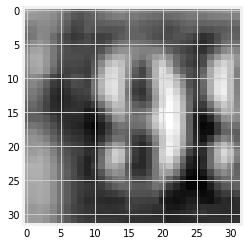

In [60]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32), cmap = 'gray')

In [61]:
#Predicting the digits
print('Label: ', np.argmax(keras_model_3.predict(X_test)[5]))

#y_predict = np.argmax(model.predict(x_test), axis=-1)

Label:  9


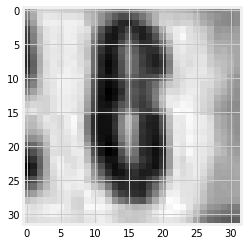

In [62]:
#Showing the image
plt.imshow(X_test[17].reshape(32,32), cmap = 'gray')

In [63]:
#Predicting the digits
print('Label: ', np.argmax(keras_model_3.predict(X_test)[17]))

Label:  6


In [76]:
#Predicting for all images
y_pred = np.argmax(keras_model_3.predict(X_test), axis=-1)
print(y_pred)

[6 7 2 ... 7 5 2]


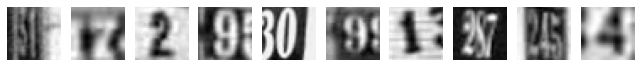

Labels for each of the above image: [6 7 2 9 0 9 3 5 6 4]


In [77]:
#visualising the first 10 images of the test data and printing their labels
plt.figure(figsize = (10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[i].reshape(32,32), cmap = 'gray')
    plt.axis('off')
plt.show()
print('Labels for each of the above image: %s' %(y_pred[0:10]))

# **Summary Classificatin report, model_accuracy & model_loss**

In the above code we saw that the Neural Network was unable to predict. The accuracy of the above Neural Network is 77% which is considerably higher than what was achieved using KNN which had an accuracy of 52.33%.

In [78]:
print('Testing the model on test dataset')
predictions = keras_model_3.predict(X_test)
predictions = np.argmax(predictions, axis=1)
score = keras_model_3.evaluate(X_test, y_test)
# label
y_test = np.argmax(y_test, axis=1)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Testing the model on test dataset
563/563 [==============================] - 2s 4ms/step - loss: 0.8668 - accuracy: 0.7671
Test loss : 0.8668394684791565
Test accuracy : 0.7670555710792542


In the above code we saw that the Neural Network was unable to predict. 

The accuracy of the above Neural Network is 77% which is considerably higher than what was achieved using KNN which had an accuracy of 52.33%.

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.60      0.74      1814
           1       0.94      0.67      0.78      1828
           2       0.97      0.74      0.84      1803
           3       0.68      0.81      0.74      1719
           4       0.94      0.78      0.85      1812
           5       0.52      0.93      0.67      1768
           6       0.62      0.86      0.72      1832
           7       0.80      0.91      0.85      1808
           8       0.80      0.76      0.78      1812
           9       0.96      0.62      0.75      1804

    accuracy                           0.77     18000
   macro avg       0.82      0.77      0.77     18000
weighted avg       0.82      0.77      0.77     18000



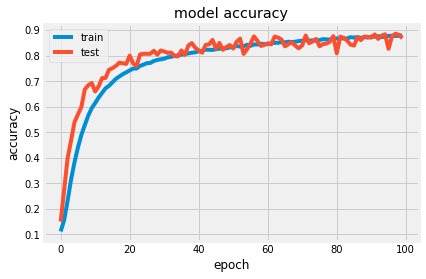

In [80]:
# summarize history for accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


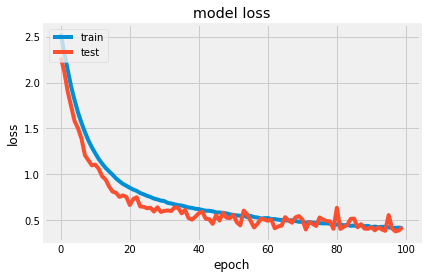

In [81]:
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Differences and trade-offs between traditional KNN and NN classifiers with the help of classification metrics**

*   
KNN requires more time to find the nearest neigbhors when compared to the time to train the model. However, Neural Network takes more time to train the model.

*   In KNN, we have only one hyperparameter neighbor (k) while in Neural Network we have so many hyperparameters (Hidden Layers, Hidden Units, Learning Rate, Number of Epochs, Activation Functions, Optimizers, dropout).




*   
Once a Neural Network is trained, the training data is no longer needed to produce new predictions. This is obviously not the case with KNN.
*   
Once a Neural Network is trained on one task, its parameters can be used as a good initializer for another (similar) task. This is a form of transfer learning that cannot be achieved with KNN.




*   KNN classification metrics shows that the accuracy is 52.33%.
*   
Using Neural Network with BatchNormalization, dropout using ADAM as optimizer we got 91% train & 77% test accuracy. We have predicted the classification of the images correctly

```NOTE```: Model can be tuned more  






